Import the neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline

Data Loading and Initial Setup

In [2]:
# Define the file paths for the uploaded training and testing data
TRAIN_FILE = "train.csv"
TEST_FILE = "test.csv"

# Define the human-readable labels corresponding to the Class Index (1 to 4)
CLASS_LABELS = {
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech",
}

print("Loading Data......")
try:
    df_train = pd.read_csv(TRAIN_FILE,header=None,names=["Class Index","Title","Description"])
    df_test = pd.read_csv(TEST_FILE,header=None,names=["Class Index","Title","Description"])
    print(f"Training samples loaded: {len(df_train)}")
    print(f"Testing samples loaded: {len(df_test)}")
except Exception as e:
    print(f"Error loading files: {e}")
    exit()



df_train

Loading Data......
Training samples loaded: 120001
Testing samples loaded: 7601


,Class Index,Title,Description
0,Class Index,Title,Description
1,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
2,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
3,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
4,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
...,...,...,...
119996,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119997,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119998,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119999,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


Pre-training visualization (EDA)

EDA: Class Distribution (Before Training)


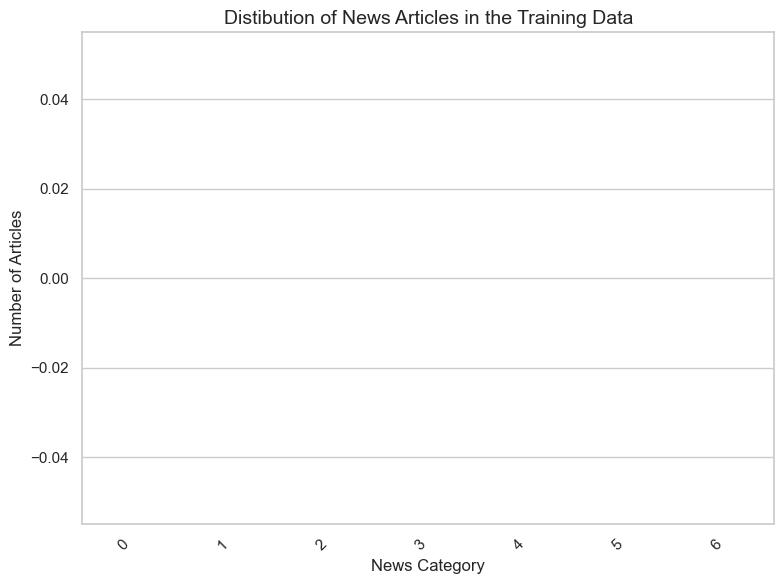

In [3]:
# Map the numerical index to the actual category name for better visualization
df_train["Category"] = df_train["Class Index"].map(CLASS_LABELS)

print("EDA: Class Distribution (Before Training)")




sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,6))
sns.countplot(data=df_train,x="Category",order=df_train["Category"].value_counts().index)
plt.title("Distibution of News Articles in the Training Data",fontsize=14)
plt.xlabel("News Category",fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

Feature Engineering (Text Processing)

In [4]:
# Combine the "Title" and "Description" columns into a single text feature for both train and test set
X_train = df_train["Title"] + " " + df_train["Description"]
y_train = df_train["Class Index"]
X_test = df_test["Title"] + " " + df_test["Description"]
y_test = df_test["Class Index"]

# Create the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    stop_words="english",
    ngram_range=(1,2),
    max_features=10000
)

# Fit the vectorizer on the training data and transform both the training and test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Feature Matrix Shape (Training): {X_train_tfidf.shape}")

Feature Matrix Shape (Training): (120001, 10000)


Model Comparison and Training

In [ ]:
classifiers = {
    "Logistic Regression": LogisticRegression(solver="liblinear",random_state=42,max_iter=1000),
    "Multinominal Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(random_state=42,dual=False),
    "Random Forest": RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=1)
}

results = {}

# Iterate though each classifier, train and evaluate its performance
print("Training and Evaluting Models")
for name, model in classifiers.items():
    print(f"Training {name}....")
    model.fit(X_train_tfidf,y_train)
    y_pred = model.predict(X_test_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(y_test,y_pred)
    results[name] = accuracy

    # Print a detailed classification report
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:")
    # Generate the report including Precision, Recall and F1-Score for each class
    print(classification_report(y_test, y_pred, labels=list(CLASS_LABELS.keys()), target_names=list(CLASS_LABELS.values())))


# Determine the best performing model based on accuracy
best_model_name = max(results,keys=results.get)
best_model = classifiers[best_model_name]
print(f"Best Model Found: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")

Post training visualization

Visualization: Model Accuracy Comparison


C:\Users\Dell\AppData\Local\Temp\ipykernel_16020\2975668786.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names,y=scores,palette="magma")


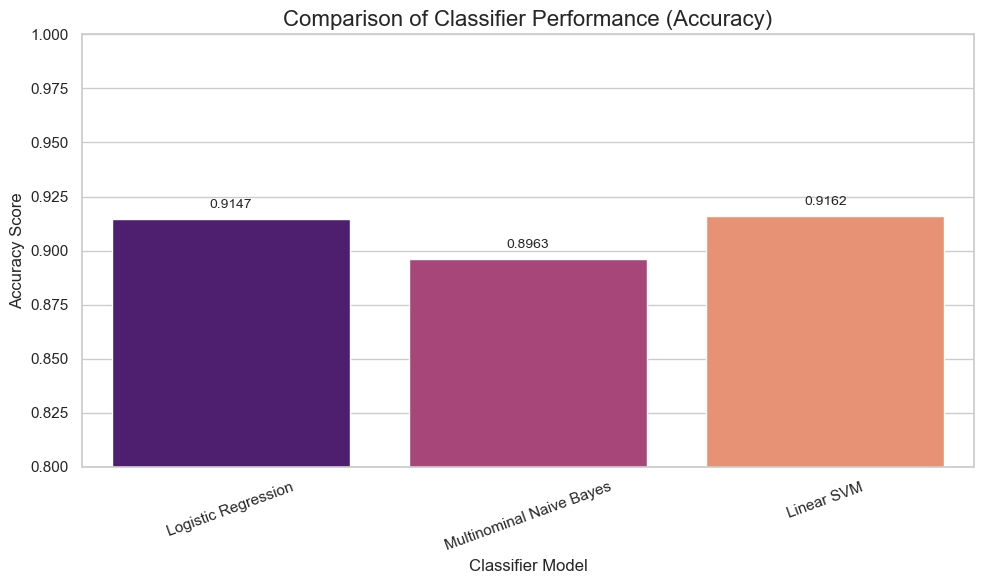

In [ ]:
print("Visualization: Model Accuracy Comparison")
names = list(results.keys())
scores = list(results.values())

plt.figure(figsize=(10,6))
# Create a bar plot of all model accuracies
sns.barplot(x=names,y=scores,palette="magma")
plt.title("Comparison of Classifier Performance (Accuracy)",fontsize=16)
plt.xlabel("Classifier Model",fontsize=12)
plt.ylabel("Accuracy Score",fontsize=12)
plt.ylim(0.8,1.0)
plt.xticks(rotation=20)
for i,score in enumerate(scores):
    plt.text(i, score + 0.005, f"{score:.4f}", ha="center",fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Confusion matrix of the best model 
best_model.fit(X_train_tfidf,y_train)
y_pred_best = best_model.predict(X_test_tfidf)
cm = confusion_matrix(y_test,y_pred_best)

plt.figure(figsize=(8,7))
# Create a heatmap visualization of the confusion matrix
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=CLASS_LABELS.values(),
    yticklabels=CLASS_LABELS.values()
)
plt.title(f"Confusion Matrix for {best_model_name}",fontsize=16)
plt.xlabel("Predicted Label",fontsize=12)
plt.ylabel("True Label",fontsize=12)
plt.show()

Interactive Prediction Input

In [ ]:
# Create a final pipeline (Vectorizing + Model) for seamless prediction
# A pipeline bundles the feature transformation and the final model training
final_pipeline = Pipeline([
    ("tfidf",tfidf_vectorizer),
    ("classifier",best_model)
])

print("-----Interactive Prediction Input-----")
print("Enter a news headline / descrption to classify, or type 'exit' to quit")

while True:
    try:
        # Prompt the user for a new article text
        user_input = input("Article Text >")

        # Check for the exit condition
        if user_input.lower() == "exit":
            print("Exiting prediction tool. Goodbye")
            break

        # Check if input is empty
        if not user_input.strip():
            print("Please enter some text")
            continue

        # Predict the class index using the trained pipeline
        prediction_index = final_pipeline.predict([user_input])[0]

        # Look up the human-readable label using the prediction index
        predicted_label = CLASS_LABELS.get(prediction_index,"Unknown Category")

        # Output the result
        print(f" Prediction Result")
        print(f"[Class Index: {predicted_index}] -> CATEGORY: {predicted_label}")

    except Exception as e:
        # Handle the potential errors during input or prediction
        print(f"An error occured: {e}")
        break